# To run:
Use an IDE that will allow you to open a Jupyter Notebook
For example, use Anaconda Navigator to open Visual Studio Code
You may need to select a kernel to run the program

$ pip install librosa

$ pip install SoundFile

===================

IMPORTANT:

If you encounter an error with SoundFile, you may have to uninstall SoundFile with 

$pip uninstall SoundFile 

and then reinstall it


https://youtu.be/R-5uxKTRjzM

https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

In [79]:
import librosa
import numpy as np
from librosa import display
import scipy

In [80]:
#file_path = "../audio/music/mu1.wav"
file_path = "../audio/speech/sp1.wav"
samples, sampling_rate = librosa.load(file_path)
len(samples), sampling_rate

(88200, 22050)

In [81]:
from IPython.display import Audio
Audio(file_path)

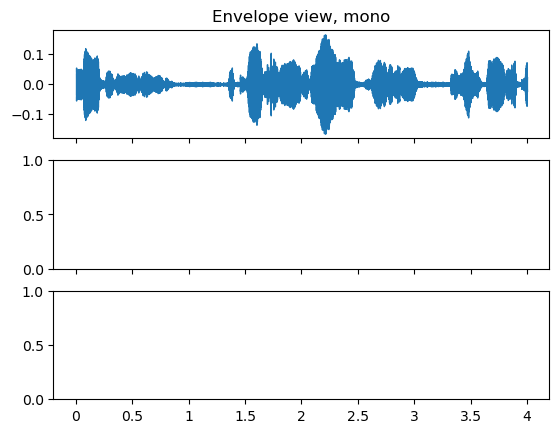

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(samples, sr=sampling_rate, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

In [83]:
from scipy.fft import fft, ifft
y = np.fft.fft(samples)

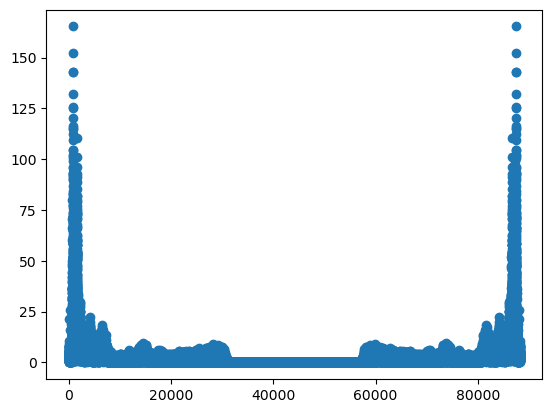

In [84]:
plt.plot(abs(y), "o")
plt.show()

In [85]:
y.shape

(88200,)

In [86]:
y[0]

(2.1640809521813935+0j)

In [87]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    plt.figure(figsize=(18, 5))

    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(title)
    plt.show()


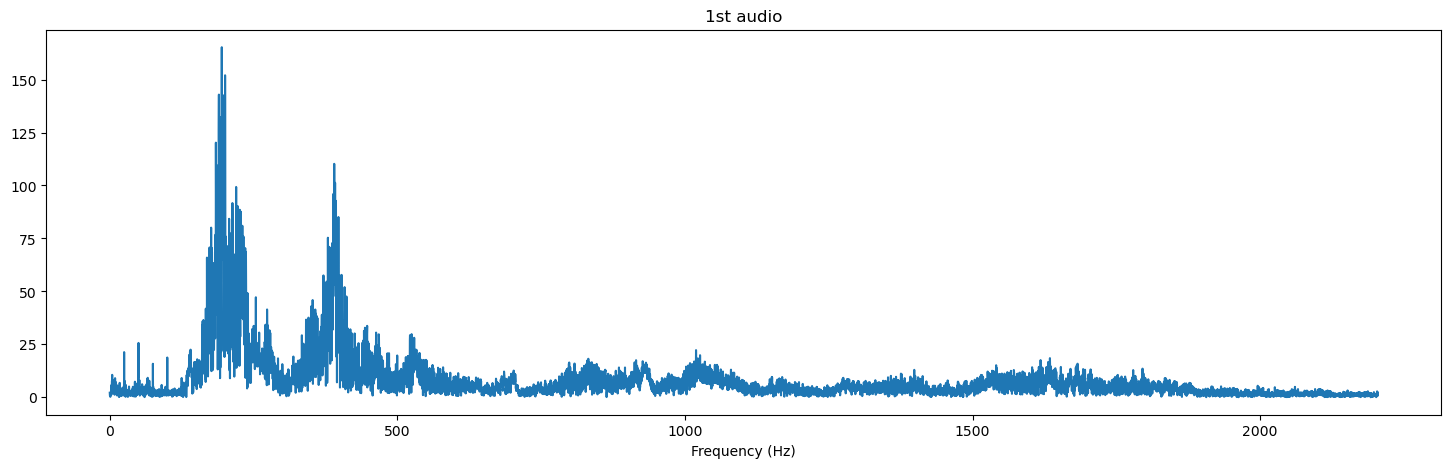

In [88]:
plot_magnitude_spectrum(samples, "1st audio", sampling_rate, 0.1)

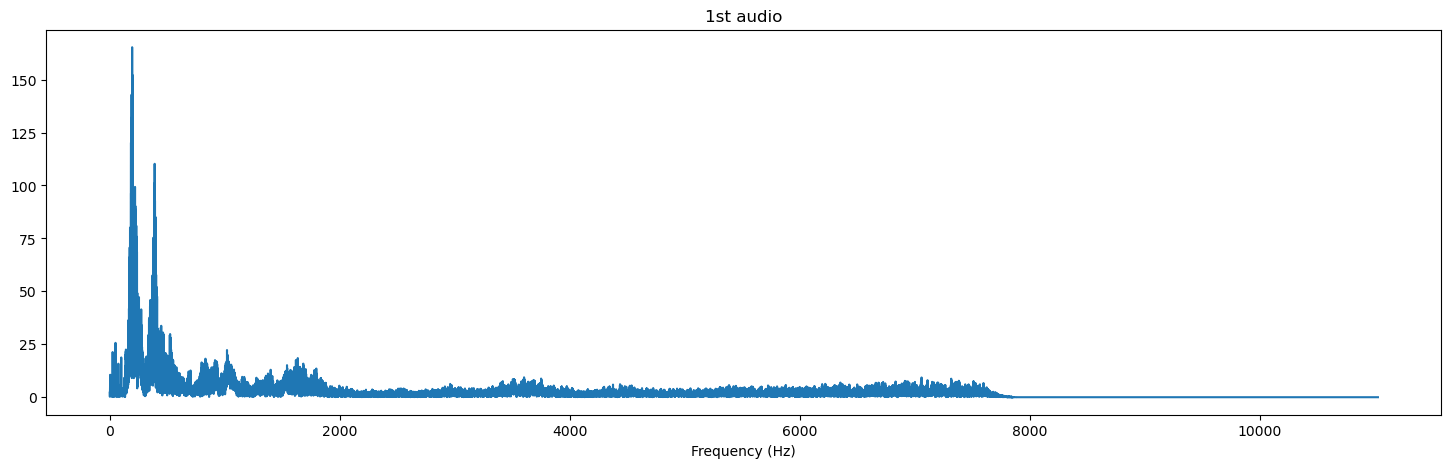

In [89]:
plot_magnitude_spectrum(samples, "1st audio", sampling_rate, 0.5)

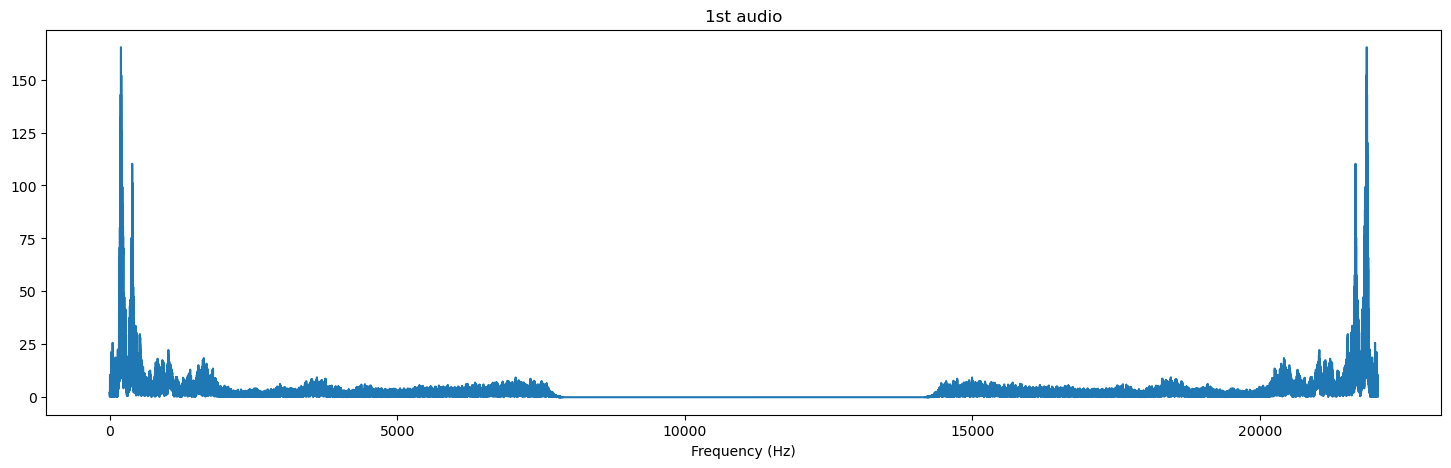

In [90]:
plot_magnitude_spectrum(samples, "1st audio", sampling_rate, 1)

# ZERO CROSSINGS

In [91]:
samples, sampling_rate = librosa.load(file_path)
zero_crossings = librosa.zero_crossings(samples, pad=False)

In [92]:
zero_crossings.shape

(88200,)

In [93]:
zero_crossings.dtype

dtype('bool')

In [94]:
np.count_nonzero(zero_crossings == False)

78082

In [95]:
np.count_nonzero(zero_crossings == True)

10118

In [96]:
sum(zero_crossings)

10118

# AVERAGE ENERGY

In [97]:
type(samples)

numpy.ndarray

In [98]:
len(samples)

88200

In [99]:
samples[0]

0.0044710403

In [100]:
for sample in range(len(samples)):
    samples[sample] = samples[sample]*samples[sample]

In [101]:
samples[0]

1.9990202e-05

In [102]:
avg_energy = sum(samples)/len(samples)

In [103]:
avg_energy

0.000522753621373215

Other features?

https://medium.com/@jdmitchell0216/generating-audio-features-with-librosa-63dac0fe9d91